# LA Communities Plots
## adding regional plots based on GroupAssignment3
Name: Qingyang Xu

Data resouce: Social Explorer American Community Survey (ACS) 2018--2022 (5-Year-Estimates); Los Angeles Traffic Collisions (2018-2022)

This notebook investigates the exploration and visualization of census data related to vehicle ownership and the data of LA collsions.

Updates: 1) Plot Collision data on OpenStreeMap, including maps for each year; 2) Regroup Vehicle Ownership categories, update distribution maps accordingly; 3) Regional plots of communities for both Vehicle Ownership data and Collision data.

In [1]:
# importing python libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
pip install contextily


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Collision Data

In [56]:
# Importing data
Collision = pd.read_csv('/Users/ericji/Desktop/2024 Winter/UP221 /qingyang/Traffic_Collision_Data_2018_to_2022.csv')
Collision.head()

DR Number Date Reported Date Occurred  Time Occurred  Area ID Area Name  \
0  180104039    01/01/2018    01/01/2018           1740        1   Central   
1  180104668    01/10/2018    01/01/2018           1540        1   Central   
2  180104040    01/01/2018    01/01/2018           1900        1   Central   
3  180104001    01/01/2018    01/01/2018             38        1   Central   
4  180104044    01/01/2018    01/01/2018           1030        1   Central   

   Reporting District  Crime Code Crime Code Description  \
0                 192         997      TRAFFIC COLLISION   
1                 182         997      TRAFFIC COLLISION   
2                 154         997      TRAFFIC COLLISION   
3                 192         997      TRAFFIC COLLISION   
4                 182         997      TRAFFIC COLLISION   

                             MO Codes  Victim Age Victim Sex Victim Descent  \
0       3101 3401 3701 3009 3025 3036        50.0          F              O   
1            3101 3401 3701 3004 3030         NaN          M              W   
2       3101 3401 3701 3006 3030 3032        25.0          M              W   
3  3101 3401 3701 3002 3011 3034 3036         NaN          M              H   
4       3101 3401 3701 3004 3026 3036        33.0          M              B   

   Premise Code Premise Description                          Address  \
0         101.0              STREET  VENICE                       BL   
1         101.0              STREET  VERDUGO                      RD   
2         108.0         PARKING LOT                           SPRING   
3         101.0              STREET                            GRAND   
4         101.0              STREET                             HOPE   

                      Cross Street              Location  
0  GRAND                        AV  (34.0363, -118.2677)  
1                            YUKON   (34.042, -118.2625)  
2                              6TH   (34.046, -118.2509)  
3                       WASHINGTON  (34.0327, -118.2683)  
4                             PICO  (34.0395, -118.2656)

In [59]:
# Use the 'str.extract' method to capture latitude and longitude
location_data = Collision['Location'].str.extract(r'\(([^,]+),\s*([^\)]+)\)')
location_data.columns = ['Latitude', 'Longitude']

# Convert the latitude and longitude to float
Collision['Latitude'] = location_data['Latitude'].astype(float)
Collision['Longitude'] = location_data['Longitude'].astype(float)

# The original data now has two new columns: 'Latitude' and 'Longitude'
# And all other columns are retained


In [60]:
Collision.head()


DR Number Date Reported Date Occurred  Time Occurred  Area ID Area Name  \
0  180104039    01/01/2018    01/01/2018           1740        1   Central   
1  180104668    01/10/2018    01/01/2018           1540        1   Central   
2  180104040    01/01/2018    01/01/2018           1900        1   Central   
3  180104001    01/01/2018    01/01/2018             38        1   Central   
4  180104044    01/01/2018    01/01/2018           1030        1   Central   

   Reporting District  Crime Code Crime Code Description  \
0                 192         997      TRAFFIC COLLISION   
1                 182         997      TRAFFIC COLLISION   
2                 154         997      TRAFFIC COLLISION   
3                 192         997      TRAFFIC COLLISION   
4                 182         997      TRAFFIC COLLISION   

                             MO Codes  Victim Age Victim Sex Victim Descent  \
0       3101 3401 3701 3009 3025 3036        50.0          F              O   
1            3101 3401 3701 3004 3030         NaN          M              W   
2       3101 3401 3701 3006 3030 3032        25.0          M              W   
3  3101 3401 3701 3002 3011 3034 3036         NaN          M              H   
4       3101 3401 3701 3004 3026 3036        33.0          M              B   

   Premise Code Premise Description                          Address  \
0         101.0              STREET  VENICE                       BL   
1         101.0              STREET  VERDUGO                      RD   
2         108.0         PARKING LOT                           SPRING   
3         101.0              STREET                            GRAND   
4         101.0              STREET                             HOPE   

                      Cross Street              Location  Latitude  Longitude  
0  GRAND                        AV  (34.0363, -118.2677)   34.0363  -118.2677  
1                            YUKON   (34.042, -118.2625)   34.0420  -118.2625  
2                              6TH   (34.046, -118.2509)   34.0460  -118.2509  
3                       WASHINGTON  (34.0327, -118.2683)   34.0327  -118.2683  
4                             PICO  (34.0395, -118.2656)   34.0395  -118.2656

In [4]:
# Import the shapely module from the GeoPandas library.
from shapely.geometry import Point

In [5]:
# Define a function to transform coordinate points.
def parse_location(location_str):
    try:
        lat, lon = map(float, location_str.strip("()").split(", "))
        return Point(lon, lat)
    except:
        return None

In [6]:
# Apply the function
Collision['geometry'] = Collision['Location'].apply(parse_location)

# Remove unneeded lines
Collision = Collision.dropna(subset=['geometry'])

In [7]:
# Convert data into GeoPandas format (geographic data).
#gdf_tracts_vehicle = gpd.GeoDataFrame(tracts_vehicle, geometry='geometry')
gdf_Collision = gpd.GeoDataFrame(Collision, geometry='geometry')

# Set up and harmonize coordinate systems.
#gdf_tracts_vehicle.set_crs(epsg=4326, inplace=True)
gdf_Collision.set_crs(epsg=4326, inplace=True)

DR Number Date Reported Date Occurred  Time Occurred  Area ID  \
0       180104039    01/01/2018    01/01/2018           1740        1   
1       180104668    01/10/2018    01/01/2018           1540        1   
2       180104040    01/01/2018    01/01/2018           1900        1   
3       180104001    01/01/2018    01/01/2018             38        1   
4       180104044    01/01/2018    01/01/2018           1030        1   
...           ...           ...           ...            ...      ...   
191366  230204688    12/31/2022    12/31/2022           1240        2   
191367  230904001    01/01/2023    12/31/2022           2225        9   
191368  222019939    12/31/2022    12/31/2022           1240       20   
191369  230106871    12/31/2022    12/31/2022           1225        1   
191370  231808015    03/23/2023    12/31/2022            935       18   

        Area Name  Reporting District  Crime Code Crime Code Description  \
0         Central                 192         997      TRAFFIC COLLISION   
1         Central                 182         997      TRAFFIC COLLISION   
2         Central                 154         997      TRAFFIC COLLISION   
3         Central                 192         997      TRAFFIC COLLISION   
4         Central                 182         997      TRAFFIC COLLISION   
...           ...                 ...         ...                    ...   
191366    Rampart                 218         997      TRAFFIC COLLISION   
191367   Van Nuys                 964         997      TRAFFIC COLLISION   
191368    Olympic                2076         997      TRAFFIC COLLISION   
191369    Central                 162         997      TRAFFIC COLLISION   
191370  Southeast                1862         997      TRAFFIC COLLISION   

                                            MO Codes  Victim Age Victim Sex  \
0                      3101 3401 3701 3009 3025 3036        50.0          F   
1                           3101 3401 3701 3004 3030         NaN          M   
2                      3101 3401 3701 3006 3030 3032        25.0          M   
3                 3101 3401 3701 3002 3011 3034 3036         NaN          M   
4                      3101 3401 3701 3004 3026 3036        33.0          M   
...                                              ...         ...        ...   
191366                                0605 3030 4024        35.0          M   
191367       3038 3602 3101 3004 3026 4026 3029 3037        58.0          M   
191368  3006 3028 3030 4027 3034 3037 3101 3401 3701        22.0        NaN   
191369                                0605 3030 4024        47.0          M   
191370                      4025 3004 3028 3030 3101        25.0          M   

       Victim Descent  Premise Code Premise Description  \
0                   O         101.0              STREET   
1                   W         101.0              STREET   
2                   W         108.0         PARKING LOT   
3                   H         101.0              STREET   
4                   B         101.0              STREET   
...               ...           ...                 ...   
191366              O         101.0              STREET   
191367              W         101.0              STREET   
191368            NaN         101.0              STREET   
191369              W         101.0              STREET   
191370              H         101.0              STREET   

                                        Address  \
0               VENICE                       BL   
1               VERDUGO                      RD   
2                                        SPRING   
3                                         GRAND   
4                                          HOPE   
...                                         ...   
191366  1500 W  SUNSET                       BL   
191367          WOODMAN                      AV   
191368          VERMONT                      AV   
191369       W  8TH                          ST   

In [8]:
# Filter out invalid coordinate points
gdf_Collision = gdf_Collision[(gdf_Collision.geometry.x != 0) & (gdf_Collision.geometry.y != 0)]

<Axes: >

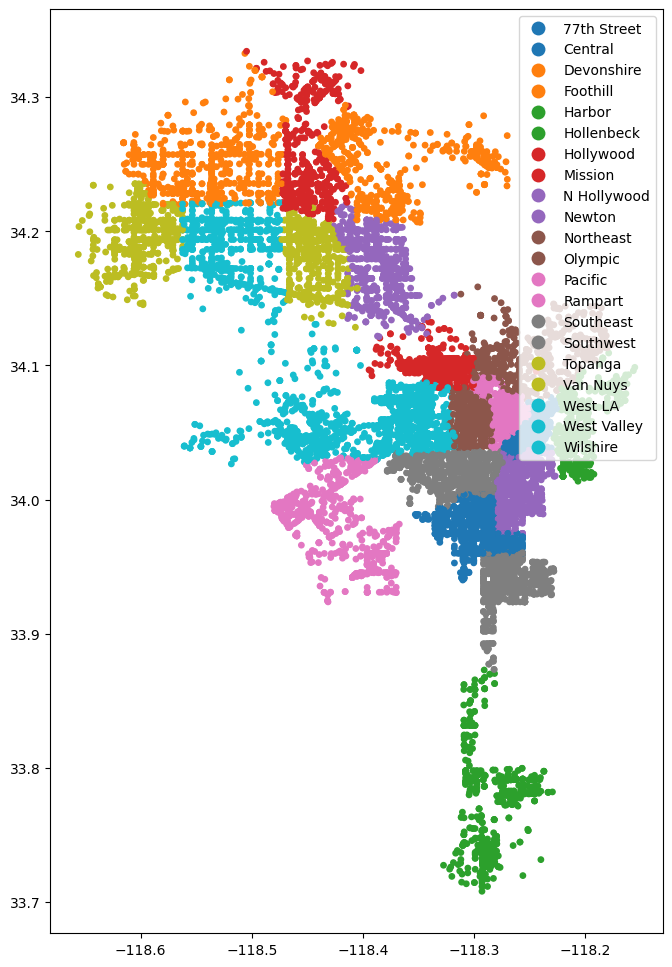

In [9]:
# plot a GeoDataFrame
gdf_Collision.sample(13000).plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            markersize=15,  # Adjust this value to change the size of the dots
            column = 'Area Name',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

## Plot it onto OpenStreetMap

In [10]:
# output the data's projection
gdf_Collision.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

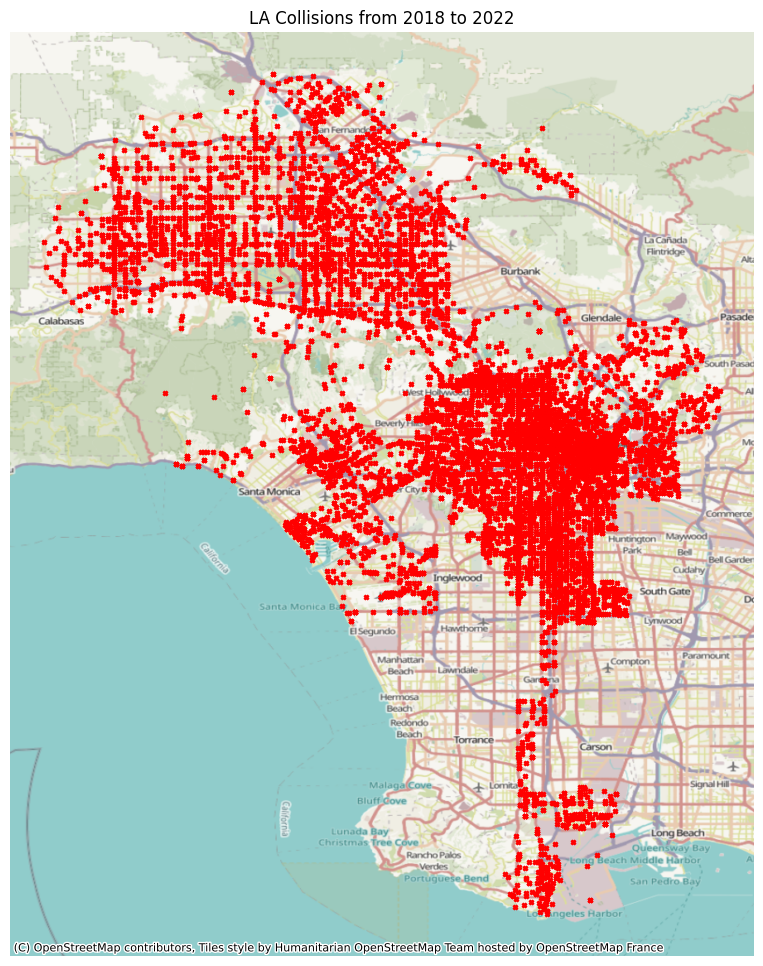

In [11]:
import matplotlib.pyplot as plt
import contextily as ctx

def plot_Collision(data, figsize=(12, 12), marker='X', markersize=10, color='red', title='LA Collisions from 2018 to 2022', crs='EPSG:4326'):

    fig, ax = plt.subplots(figsize=figsize)

    # add the data to the plot
    data.plot(ax=ax, marker=marker, markersize=markersize, color=color)

    # turn the axes off
    ax.axis('off')

    # give it a title
    ax.set_title(title)

    # add a basemap
    ctx.add_basemap(ax, crs=crs)

    plt.show()

plot_Collision(gdf_Collision.sample(10000)) #take samples of 10000

## Plot for each year (using a loop)

In [12]:
# Convert your date column to datetime format
gdf_Collision['Date Occurred'] = pd.to_datetime(gdf_Collision['Date Occurred'], format='%m/%d/%Y')

# Create a new column 'Year'
gdf_Collision['Year'] = gdf_Collision['Date Occurred'].dt.year

/Users/ericji/Desktop/2024 Winter/pythonProject/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/ericji/Desktop/2024 Winter/pythonProject/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


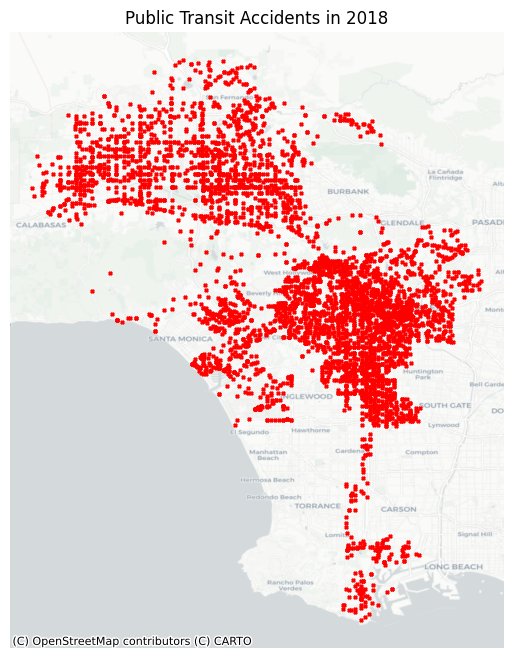

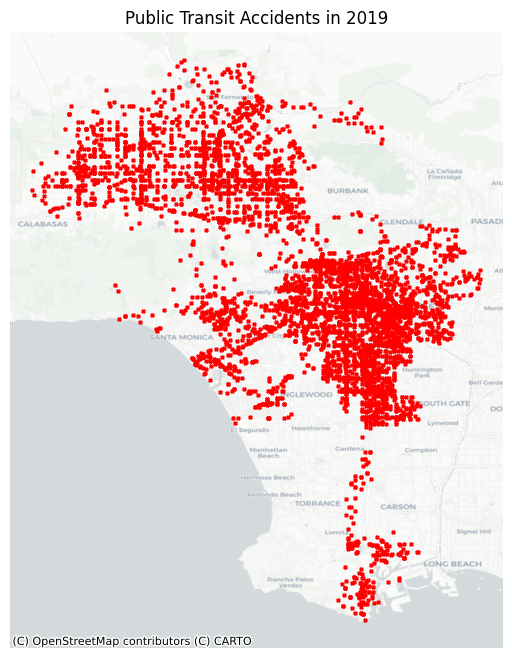

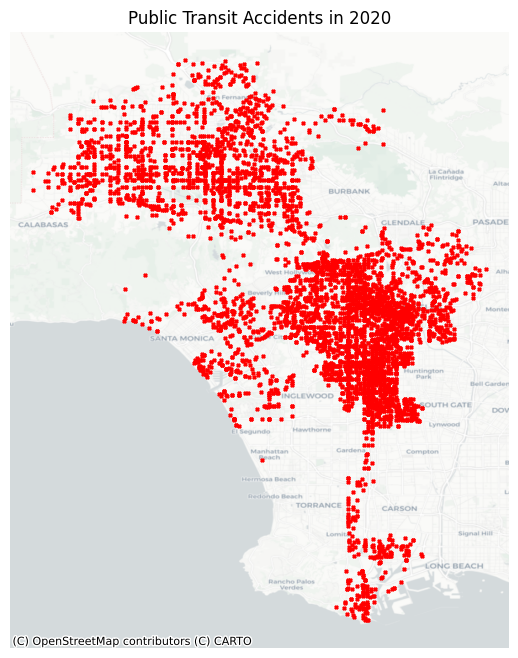

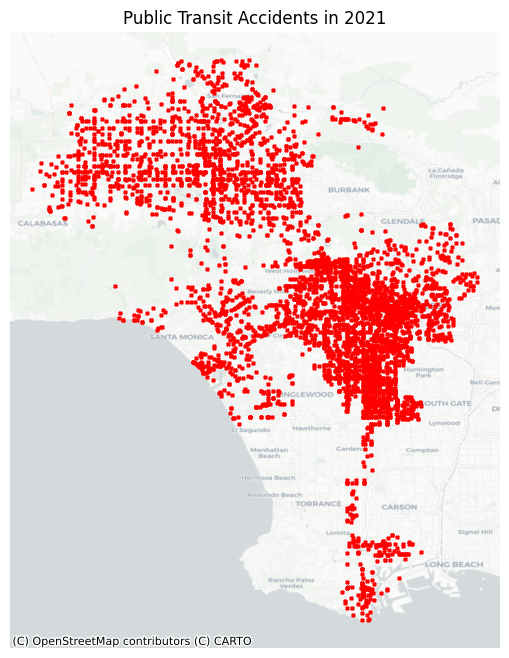

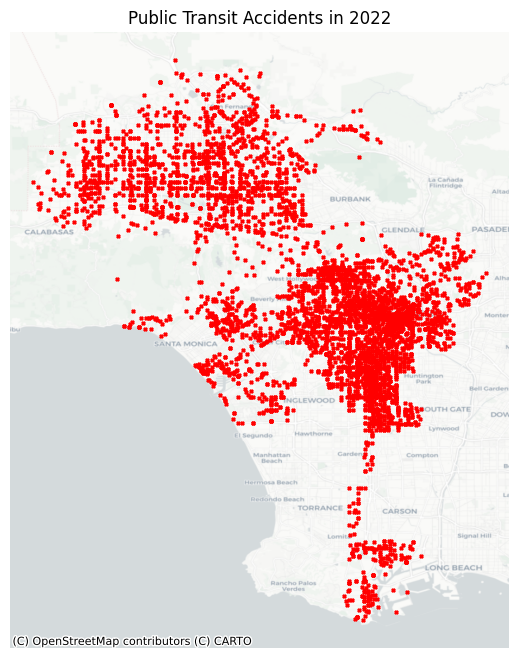

In [13]:
# loop through year
for Year in gdf_Collision['Year'].unique():

    # Get the data for the specific year
    data_for_year = gdf_Collision[gdf_Collision.Year == Year]

    # Check if the dataframe is not empty
    if not data_for_year.empty:

        # Sample a subset of the data for the year
        sample_data_for_year = data_for_year.sample(min(len(data_for_year), 5000))

        # map it
        fig, ax = plt.subplots(figsize=(8,8))

        sample_data_for_year.plot(ax=ax, 
                          marker='X',
                          markersize=5,
                          color='red')

        # no axes
        ax.axis('off')

        # title
        ax.set_title('Public Transit Accidents in '+str(Year))

        #basemap
        ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

Although it is not very obvious from these maps, it can be seen that the number (intensity) of collisions in 2022 has increased compared to previous years.

# Census Data (Vehicle Ownership)

In [14]:
# Importing data
Vehicle = pd.read_csv('/Users/ericji/Desktop/2024 Winter/UP221 /qingyang/R13562228_SL140.csv')
Vehicle = pd.read_csv(
    '/Users/ericji/Desktop/2024 Winter/UP221 /qingyang/R13562228_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)
Vehicle.head()

Geo_FIPS                                      Geo_QName Geo_STUSAB  \
0  06001400100  Census Tract 4001, Alameda County, California         ca   
1  06001400200  Census Tract 4002, Alameda County, California         ca   
2  06001400300  Census Tract 4003, Alameda County, California         ca   
3  06001400400  Census Tract 4004, Alameda County, California         ca   
4  06001400500  Census Tract 4005, Alameda County, California         ca   

   Geo_SUMLEV  Geo_GEOCOMP  Geo_US  Geo_REGION  Geo_DIVISION Geo_STATE  \
0         140            0     NaN         NaN           NaN        06   
1         140            0     NaN         NaN           NaN        06   
2         140            0     NaN         NaN           NaN        06   
3         140            0     NaN         NaN           NaN        06   
4         140            0     NaN         NaN           NaN        06   

  Geo_COUNTY  ...  SE_A10054B_004  SE_A10054B_005  SE_A10054B_006  \
0        001  ...              45               0               0   
1        001  ...              70               0               3   
2        001  ...             247              62               0   
3        001  ...             213             108               0   
4        001  ...             278              12              42   

   SE_A10054B_007  PCT_SE_A10054B_002  PCT_SE_A10054B_003  PCT_SE_A10054B_004  \
0              26                0.00               44.09               35.43   
1               0               19.69               61.40               18.13   
2              10               19.57               61.56               14.61   
3               0               22.44               41.38               24.01   
4               0               16.29               45.90               31.66   

   PCT_SE_A10054B_005  PCT_SE_A10054B_006  PCT_SE_A10054B_007  
0                0.00                0.00               20.47  
1                0.00                0.78                0.00  
2                3.67                0.00                0.59  
3               12.18                0.00                0.00  
4                1.37                4.78                0.00  

[5 rows x 58 columns]

In [15]:
Vehicle = Vehicle.dropna(axis=1,how="all")
columns_to_keep = ['Geo_FIPS',
                   'SE_A10054B_001',
                   'SE_A10054B_002',
                   'SE_A10054B_003',
                   'SE_A10054B_004',
                   'SE_A10054B_005',
                   'SE_A10054B_006',
                   'SE_A10054B_007']
Vehicle2 = Vehicle[columns_to_keep]
Vehicle2.columns = ['FIPS',
'Renter-Occupied_Housing_Units',
'No_Vehicle_Available',
'1_Vehicle_Available',
'2_Vehicle_Available',
'3_Vehicle_Available',
'4_Vehicle_Available',
'5_or_More_Vehicles_Available']
Vehicle2.sample(5)

FIPS  Renter-Occupied_Housing_Units  No_Vehicle_Available  \
1194  06029003135                            284                    79   
7968  06085504318                            376                    11   
3793  06037920035                            756                    81   
4687  06059087505                            728                    63   
7944  06085503708                            325                    32   

      1_Vehicle_Available  2_Vehicle_Available  3_Vehicle_Available  \
1194                  141                    0                    0   
7968                   24                  196                   76   
3793                  185                  314                  176   
4687                  332                  251                   60   
7944                   80                   96                   69   

      4_Vehicle_Available  5_or_More_Vehicles_Available  
1194                    8                            56  
7968                   69                             0  
3793                    0                             0  
4687                   22                             0  
7944                   48                             0

In [16]:
tracts=gpd.read_file('/Users/ericji/Desktop/2024 Winter/UP221 /2020_Census_Tracts.geojson')
tracts.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0      4992  101110  1011.10  1.229562e+07   15083.854287   
1      4993  101122  1011.22  2.845774e+07   31671.455844   
2      4994  101220  1012.20  7.522093e+06   12698.783810   
3      4995  101221  1012.21  3.812000e+06    9161.710543   
4      4996  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry  
0  POLYGON ((-118.29793 34.26323, -118.30082 34.2...  
1  POLYGON ((-118.27743 34.25991, -118.27743 34.2...  
2  POLYGON ((-118.27818 34.25577, -118.27887 34.2...  
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  
4  POLYGON ((-118.28594 34.25590, -118.28697 34.2...

In [17]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts_vehicle=tracts.merge(Vehicle2,on="FIPS")

## Regroup (merging the maximum group)
In previous work, I kept the  6 categories from orginal data and focused on the minimum and maximum goups. However, for a more comprehensive analysis, the other groups should not be ignored. 
According to the latest statistics, the average car ownership is 2 cars per household in LA (1.88 cars per household in whole U.S.). The numbers in the last three columns are also relatively smaller than the first three columns. So I regroup the data by merging the three largest groups together into one group "3 or More Vehicles Available".

In [18]:
# Create a new column "3 or More Vehicles Available"
tracts_vehicle['3_or_More_Vehicles_Available'] = tracts_vehicle['3_Vehicle_Available'] + tracts_vehicle['4_Vehicle_Available'] + tracts_vehicle['5_or_More_Vehicles_Available']
tracts_vehicle.head()

OBJECTID    CT20    LABEL   ShapeSTArea  ShapeSTLength  \
0      4992  101110  1011.10  1.229562e+07   15083.854287   
1      4993  101122  1011.22  2.845774e+07   31671.455844   
2      4994  101220  1012.20  7.522093e+06   12698.783810   
3      4995  101221  1012.21  3.812000e+06    9161.710543   
4      4996  101222  1012.22  3.191371e+06    9980.600461   

                                            geometry         FIPS  \
0  POLYGON ((-118.29793 34.26323, -118.30082 34.2...  06037101110   
1  POLYGON ((-118.27743 34.25991, -118.27743 34.2...  06037101122   
2  POLYGON ((-118.27818 34.25577, -118.27887 34.2...  06037101220   
3  POLYGON ((-118.28735 34.25591, -118.28863 34.2...  06037101221   
4  POLYGON ((-118.28594 34.25590, -118.28697 34.2...  06037101222   

   Renter-Occupied_Housing_Units  No_Vehicle_Available  1_Vehicle_Available  \
0                            711                   114                  248   
1                            344                     0                  169   
2                            767                    55                  319   
3                           1077                   259                  285   
4                            897                   223                  183   

   2_Vehicle_Available  3_Vehicle_Available  4_Vehicle_Available  \
0                  268                   72                    9   
1                   47                  104                    0   
2                  322                   18                   53   
3                  393                   51                   89   
4                  401                   51                   28   

   5_or_More_Vehicles_Available  3_or_More_Vehicles_Available  
0                             0                            81  
1                            24                           128  
2                             0                            71  
3                             0                           140  
4                            11                            90

## Maps for each group (using a loop)
These maps have been plotted in previous assignments. But I tried to use a loop in order to cut down the amount of code.

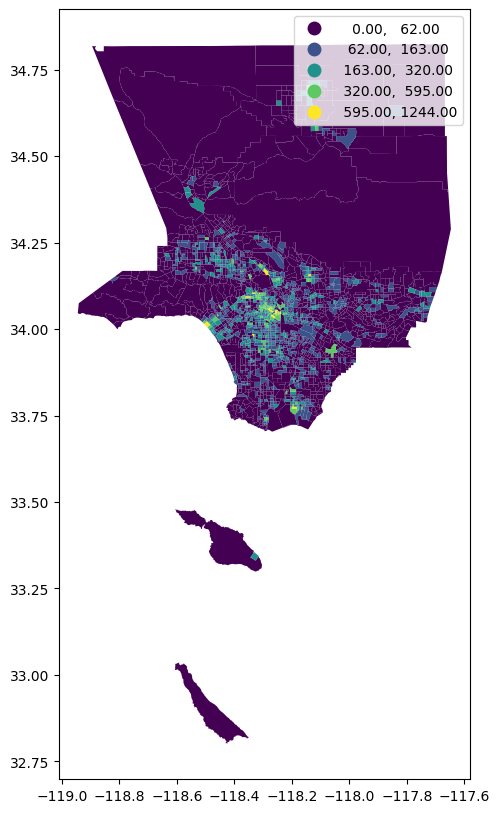

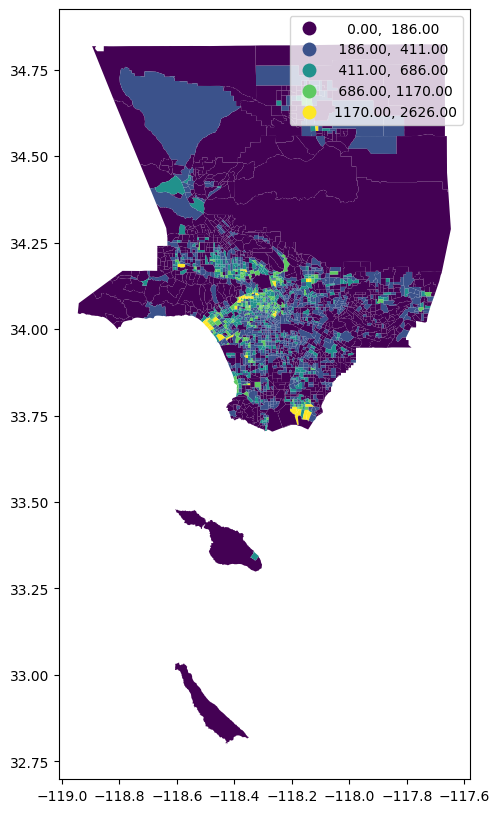

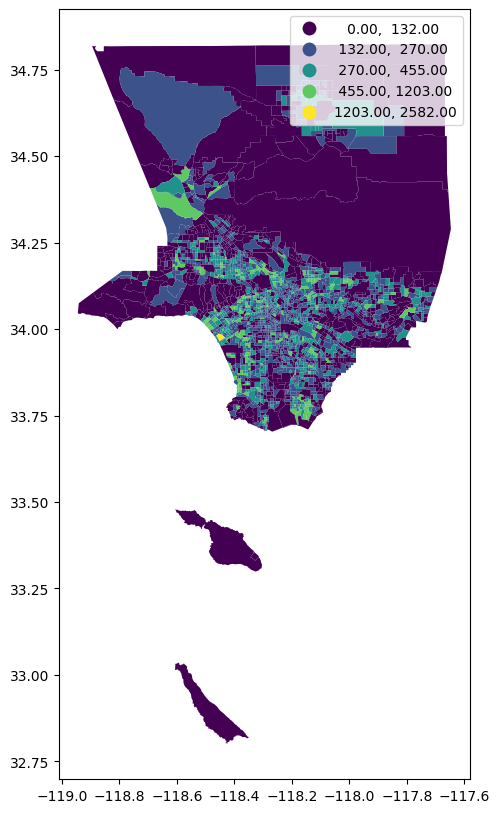

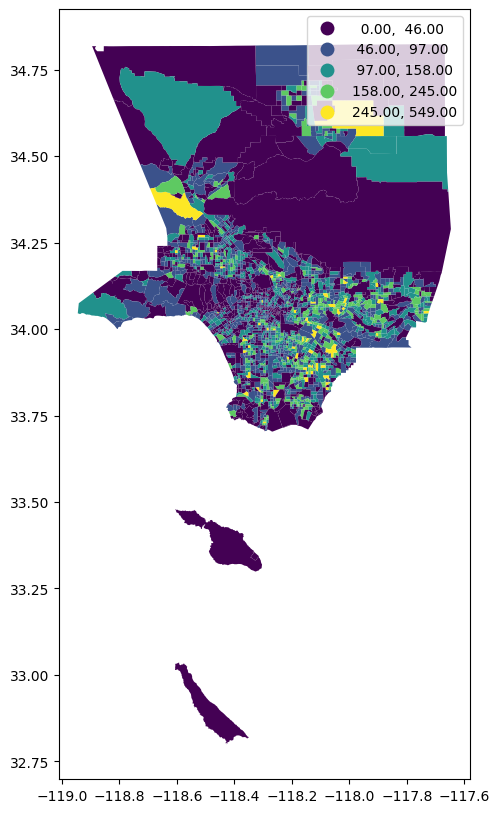

In [19]:
# create a list of routes
group = ["No_Vehicle_Available","1_Vehicle_Available","2_Vehicle_Available","3_or_More_Vehicles_Available"]

for Vehicle in group:
    
# create choropleth maps in geopandas
    tracts_vehicle.plot(figsize=(12,10),
                     column=Vehicle,
                     legend=True, 
                     scheme='NaturalBreaks')

# Add regional plots of LA communities

In [20]:
tracts_vehicle_1=gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")
tracts_vehicle_1.head()

OBJECTID                    name  \
0         1         Adams-Normandie   
1         2                  Arleta   
2         3       Arlington Heights   
3         4         Atwater Village   
4         5  Baldwin Hills/Crenshaw   

                                            geometry  
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...  
3  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...  
4  POLYGON ((-118.36102 34.02532, -118.36026 34.0...

<Axes: >

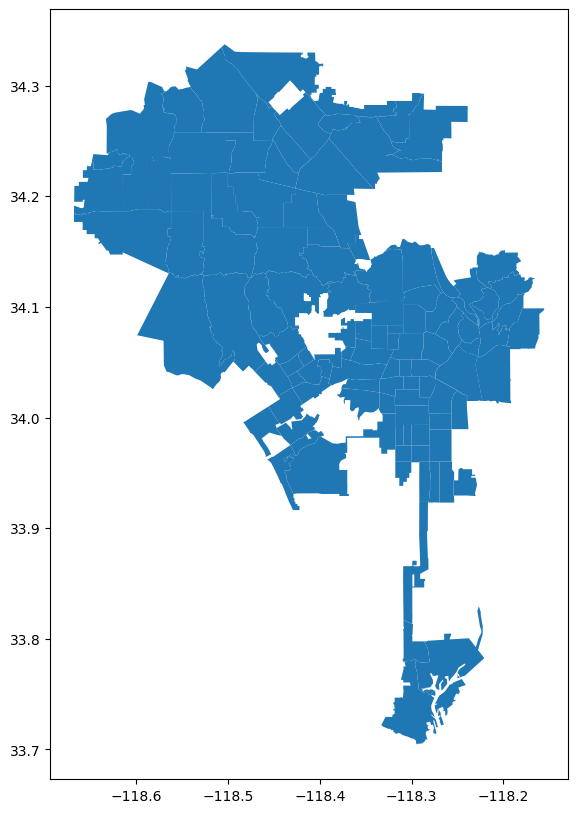

In [21]:
tracts_vehicle_1.plot(figsize=(12,10))


In [22]:
tracts_vehicle_1 = tracts_vehicle_1[['name','geometry']]
tracts_vehicle_1.head()

name                                           geometry
0         Adams-Normandie  POLYGON ((-118.30069 34.03731, -118.30388 34.0...
1                  Arleta  POLYGON ((-118.44255 34.26412, -118.44240 34.2...
2       Arlington Heights  POLYGON ((-118.31862 34.05306, -118.31673 34.0...
3         Atwater Village  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...
4  Baldwin Hills/Crenshaw  POLYGON ((-118.36102 34.02532, -118.36026 34.0...

In [23]:
tracts_vehicle_1['FIPS'] ='06' + '037' + tracts['CT20']

In [24]:
tracts_vehicle_1.head()

name                                           geometry  \
0         Adams-Normandie  POLYGON ((-118.30069 34.03731, -118.30388 34.0...   
1                  Arleta  POLYGON ((-118.44255 34.26412, -118.44240 34.2...   
2       Arlington Heights  POLYGON ((-118.31862 34.05306, -118.31673 34.0...   
3         Atwater Village  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...   
4  Baldwin Hills/Crenshaw  POLYGON ((-118.36102 34.02532, -118.36026 34.0...   

          FIPS  
0  06037101110  
1  06037101122  
2  06037101220  
3  06037101221  
4  06037101222

In [25]:
df = pd.read_csv('/Users/ericji/Desktop/2024 Winter/UP221 /qingyang/R13562228_SL140.csv')

In [26]:
df.head()

Geo_FIPS                                      Geo_QName Geo_STUSAB  \
0  6001400100  Census Tract 4001, Alameda County, California         ca   
1  6001400200  Census Tract 4002, Alameda County, California         ca   
2  6001400300  Census Tract 4003, Alameda County, California         ca   
3  6001400400  Census Tract 4004, Alameda County, California         ca   
4  6001400500  Census Tract 4005, Alameda County, California         ca   

   Geo_SUMLEV  Geo_GEOCOMP  Geo_US  Geo_REGION  Geo_DIVISION  Geo_STATE  \
0         140            0     NaN         NaN           NaN          6   
1         140            0     NaN         NaN           NaN          6   
2         140            0     NaN         NaN           NaN          6   
3         140            0     NaN         NaN           NaN          6   
4         140            0     NaN         NaN           NaN          6   

   Geo_COUNTY  ...  SE_A10054B_004  SE_A10054B_005  SE_A10054B_006  \
0           1  ...              45               0               0   
1           1  ...              70               0               3   
2           1  ...             247              62               0   
3           1  ...             213             108               0   
4           1  ...             278              12              42   

   SE_A10054B_007  PCT_SE_A10054B_002  PCT_SE_A10054B_003  PCT_SE_A10054B_004  \
0              26                0.00               44.09               35.43   
1               0               19.69               61.40               18.13   
2              10               19.57               61.56               14.61   
3               0               22.44               41.38               24.01   
4               0               16.29               45.90               31.66   

   PCT_SE_A10054B_005  PCT_SE_A10054B_006  PCT_SE_A10054B_007  
0                0.00                0.00               20.47  
1                0.00                0.78                0.00  
2                3.67                0.00                0.59  
3               12.18                0.00                0.00  
4                1.37                4.78                0.00  

[5 rows x 58 columns]

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Geo_FIPS            9129 non-null   int64  
 1   Geo_QName           9129 non-null   object 
 2   Geo_STUSAB          9129 non-null   object 
 3   Geo_SUMLEV          9129 non-null   int64  
 4   Geo_GEOCOMP         9129 non-null   int64  
 5   Geo_US              0 non-null      float64
 6   Geo_REGION          0 non-null      float64
 7   Geo_DIVISION        0 non-null      float64
 8   Geo_STATE           9129 non-null   int64  
 9   Geo_COUNTY          9129 non-null   int64  
 10  Geo_COUSUB          0 non-null      float64
 11  Geo_PLACE           0 non-null      float64
 12  Geo_TRACT           9129 non-null   int64  
 13  Geo_BLKGRP          0 non-null      float64
 14  Geo_CONCIT          0 non-null      float64
 15  Geo_AIANHH          0 non-null      float64
 16  Geo_AI

In [29]:
df.Geo_FIPS.head()

0    6001400100
1    6001400200
2    6001400300
3    6001400400
4    6001400500
Name: Geo_FIPS, dtype: int64

In [30]:
df = pd.read_csv(
    '/Users/ericji/Desktop/2024 Winter/UP221 /qingyang/R13562228_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY':str
    }
)

In [31]:
df.head()

Geo_FIPS                                      Geo_QName Geo_STUSAB  \
0  06001400100  Census Tract 4001, Alameda County, California         ca   
1  06001400200  Census Tract 4002, Alameda County, California         ca   
2  06001400300  Census Tract 4003, Alameda County, California         ca   
3  06001400400  Census Tract 4004, Alameda County, California         ca   
4  06001400500  Census Tract 4005, Alameda County, California         ca   

   Geo_SUMLEV  Geo_GEOCOMP  Geo_US  Geo_REGION  Geo_DIVISION Geo_STATE  \
0         140            0     NaN         NaN           NaN        06   
1         140            0     NaN         NaN           NaN        06   
2         140            0     NaN         NaN           NaN        06   
3         140            0     NaN         NaN           NaN        06   
4         140            0     NaN         NaN           NaN        06   

  Geo_COUNTY  Geo_COUSUB  Geo_PLACE  Geo_TRACT  Geo_BLKGRP  Geo_CONCIT  \
0        001         NaN        NaN     400100         NaN         NaN   
1        001         NaN        NaN     400200         NaN         NaN   
2        001         NaN        NaN     400300         NaN         NaN   
3        001         NaN        NaN     400400         NaN         NaN   
4        001         NaN        NaN     400500         NaN         NaN   

   Geo_AIANHH  Geo_AIANHHFP  Geo_AIHHTLI  Geo_AITS  Geo_ANRC  Geo_CBSA  \
0         NaN           NaN          NaN       NaN       NaN       NaN   
1         NaN           NaN          NaN       NaN       NaN       NaN   
2         NaN           NaN          NaN       NaN       NaN       NaN   
3         NaN           NaN          NaN       NaN       NaN       NaN   
4         NaN           NaN          NaN       NaN       NaN       NaN   

   Geo_CSA  Geo_METDIV  Geo_MACC  Geo_MEMI  Geo_NECTA  Geo_CNECTA  \
0      NaN         NaN       NaN       NaN        NaN         NaN   
1      NaN         NaN       NaN       NaN        NaN         NaN   
2      NaN         NaN       NaN       NaN        NaN         NaN   
3      NaN         NaN       NaN       NaN        NaN         NaN   
4      NaN         NaN       NaN       NaN        NaN         NaN   

   Geo_NECTADIV  Geo_UA  Geo_CDCURR  Geo_SLDU  Geo_SLDL  Geo_ZCTA3  Geo_ZCTA5  \
0           NaN     NaN         NaN       NaN       NaN        NaN        NaN   
1           NaN     NaN         NaN       NaN       NaN        NaN        NaN   
2           NaN     NaN         NaN       NaN       NaN        NaN        NaN   
3           NaN     NaN         NaN       NaN       NaN        NaN        NaN   
4           NaN     NaN         NaN       NaN       NaN        NaN        NaN   

   Geo_SUBMCD  Geo_SDELM  Geo_SDSEC  Geo_SDUNI  Geo_UR  Geo_PCI  Geo_PUMA5  \
0         NaN        NaN        NaN        NaN     NaN      NaN        NaN   
1         NaN        NaN        NaN        NaN     NaN      NaN        NaN   
2         NaN        NaN        NaN        NaN     NaN      NaN        NaN   
3         NaN        NaN        NaN        NaN     NaN      NaN        NaN   
4         NaN        NaN        NaN        NaN     NaN      NaN        NaN   

            Geo_NAME  Geo_BTTR  Geo_BTBG  Geo_PLACESE  SE_A10054B_001  \
0  Census Tract 4001       NaN       NaN          NaN             127   
1  Census Tract 4002       NaN       NaN          NaN             386   
2  Census Tract 4003       NaN       NaN          NaN            1691   
3  Census Tract 4004       NaN       NaN          NaN             887   
4  Census Tract 4005       NaN       NaN          NaN             878   

   SE_A10054B_002  SE_A10054B_003  SE_A10054B_004  SE_A10054B_005  \
0               0              56              45               0   
1              76             237              70               0   
2             331            1041             247              62   
3             199             367             213             108   
4             143             403             278          

In [32]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [33]:
df = df.dropna(axis=1,how="all")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Geo_FIPS            9129 non-null   object 
 1   Geo_QName           9129 non-null   object 
 2   Geo_STUSAB          9129 non-null   object 
 3   Geo_SUMLEV          9129 non-null   int64  
 4   Geo_GEOCOMP         9129 non-null   int64  
 5   Geo_STATE           9129 non-null   object 
 6   Geo_COUNTY          9129 non-null   object 
 7   Geo_TRACT           9129 non-null   int64  
 8   Geo_NAME            9129 non-null   object 
 9   SE_A10054B_001      9129 non-null   int64  
 10  SE_A10054B_002      9129 non-null   int64  
 11  SE_A10054B_003      9129 non-null   int64  
 12  SE_A10054B_004      9129 non-null   int64  
 13  SE_A10054B_005      9129 non-null   int64  
 14  SE_A10054B_006      9129 non-null   int64  
 15  SE_A10054B_007      9129 non-null   int64  
 16  PCT_SE

In [35]:
df.head()

Geo_FIPS                                      Geo_QName Geo_STUSAB  \
0  06001400100  Census Tract 4001, Alameda County, California         ca   
1  06001400200  Census Tract 4002, Alameda County, California         ca   
2  06001400300  Census Tract 4003, Alameda County, California         ca   
3  06001400400  Census Tract 4004, Alameda County, California         ca   
4  06001400500  Census Tract 4005, Alameda County, California         ca   

   Geo_SUMLEV  Geo_GEOCOMP Geo_STATE Geo_COUNTY  Geo_TRACT           Geo_NAME  \
0         140            0        06        001     400100  Census Tract 4001   
1         140            0        06        001     400200  Census Tract 4002   
2         140            0        06        001     400300  Census Tract 4003   
3         140            0        06        001     400400  Census Tract 4004   
4         140            0        06        001     400500  Census Tract 4005   

   SE_A10054B_001  SE_A10054B_002  SE_A10054B_003  SE_A10054B_004  \
0             127               0              56              45   
1             386              76             237              70   
2            1691             331            1041             247   
3             887             199             367             213   
4             878             143             403             278   

   SE_A10054B_005  SE_A10054B_006  SE_A10054B_007  PCT_SE_A10054B_002  \
0               0               0              26                0.00   
1               0               3               0               19.69   
2              62               0              10               19.57   
3             108               0               0               22.44   
4              12              42               0               16.29   

   PCT_SE_A10054B_003  PCT_SE_A10054B_004  PCT_SE_A10054B_005  \
0               44.09               35.43                0.00   
1               61.40               18.13                0.00   
2               61.56               14.61                3.67   
3               41.38               24.01               12.18   
4               45.90               31.66                1.37   

   PCT_SE_A10054B_006  PCT_SE_A10054B_007  
0                0.00               20.47  
1                0.78                0.00  
2                0.00                0.59  
3                0.00                0.00  
4                4.78                0.00

In [36]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A10054B_001',
                   'SE_A10054B_002',
                   'SE_A10054B_003',
                   'SE_A10054B_004',
                   'SE_A10054B_005',
                   'SE_A10054B_006',
                   'SE_A10054B_007']
df2 = df[columns_to_keep]

In [37]:
df2.columns = ['FIPS',
'Renter-Occupied_Housing_Units',
'No_Vehicle_Available',
'1_Vehicle_Available',
'2_Vehicle_Available',
'3_Vehicle_Available',
'4_Vehicle_Available',
'5_or_More_Vehicles_Available']
df2.sample(5)

FIPS  Renter-Occupied_Housing_Units  No_Vehicle_Available  \
4380  06059032055                            603                    74   
8261  06087110506                            331                     0   
8349  06089012500                            158                     0   
1220  06029003500                           1386                   361   
8837  06107003903                            201                    54   

      1_Vehicle_Available  2_Vehicle_Available  3_Vehicle_Available  \
4380                  212                  252                   36   
8261                   67                   77                  143   
8349                   57                   49                   43   
1220                  422                  328                  275   
8837                   21                   38                   65   

      4_Vehicle_Available  5_or_More_Vehicles_Available  
4380                   29                             0  
8261                    0                            44  
8349                    7                             2  
1220                    0                             0  
8837                   23                             0

In [38]:
tracts_vehicle_1=tracts_vehicle_1.merge(df2,on="FIPS")

In [39]:
tracts_vehicle_1.head()

name                                           geometry  \
0         Adams-Normandie  POLYGON ((-118.30069 34.03731, -118.30388 34.0...   
1                  Arleta  POLYGON ((-118.44255 34.26412, -118.44240 34.2...   
2       Arlington Heights  POLYGON ((-118.31862 34.05306, -118.31673 34.0...   
3         Atwater Village  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...   
4  Baldwin Hills/Crenshaw  POLYGON ((-118.36102 34.02532, -118.36026 34.0...   

          FIPS  Renter-Occupied_Housing_Units  No_Vehicle_Available  \
0  06037101110                            711                   114   
1  06037101122                            344                     0   
2  06037101220                            767                    55   
3  06037101221                           1077                   259   
4  06037101222                            897                   223   

   1_Vehicle_Available  2_Vehicle_Available  3_Vehicle_Available  \
0                  248                  268                   72   
1                  169                   47                  104   
2                  319                  322                   18   
3                  285                  393                   51   
4                  183                  401                   51   

   4_Vehicle_Available  5_or_More_Vehicles_Available  
0                    9                             0  
1                    0                            24  
2                   53                             0  
3                   89                             0  
4                   28                            11

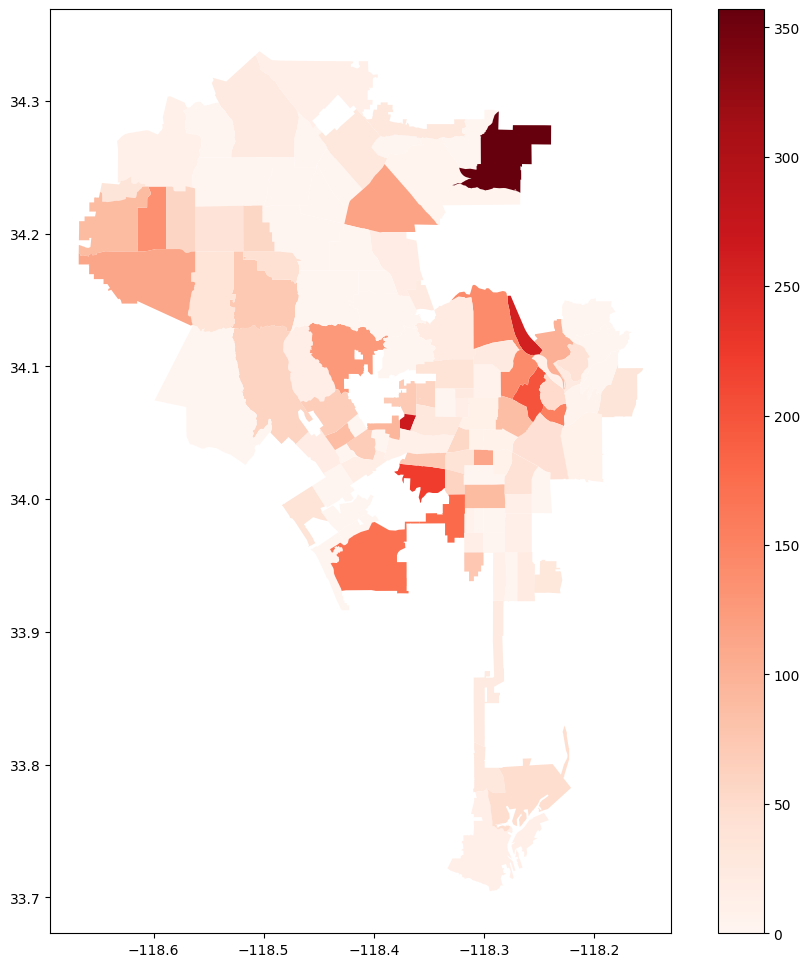

In [40]:
fig,ax = plt.subplots(figsize=(12,12))

tracts_vehicle_1.plot(ax=ax,column='No_Vehicle_Available',legend=True,cmap='Reds')
plt.savefig('No_Vehicle_Available')

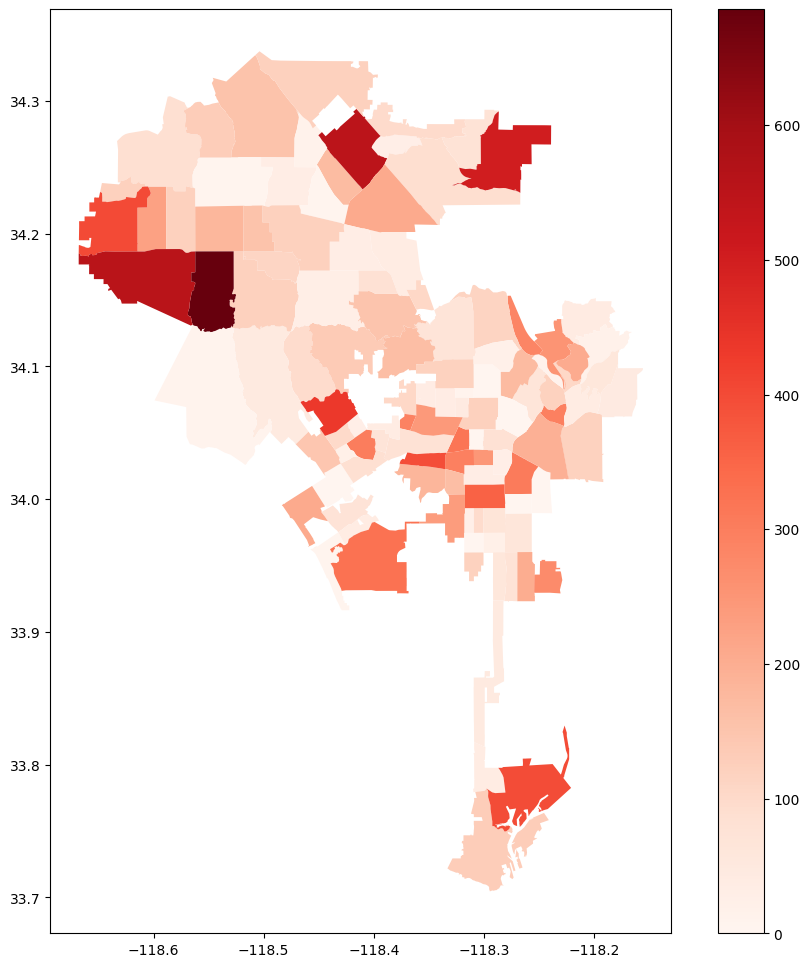

In [41]:
fig,ax = plt.subplots(figsize=(12,12))

tracts_vehicle_1.plot(ax=ax,column='1_Vehicle_Available',legend=True,cmap='Reds')
plt.savefig('1_Vehicle_Available')

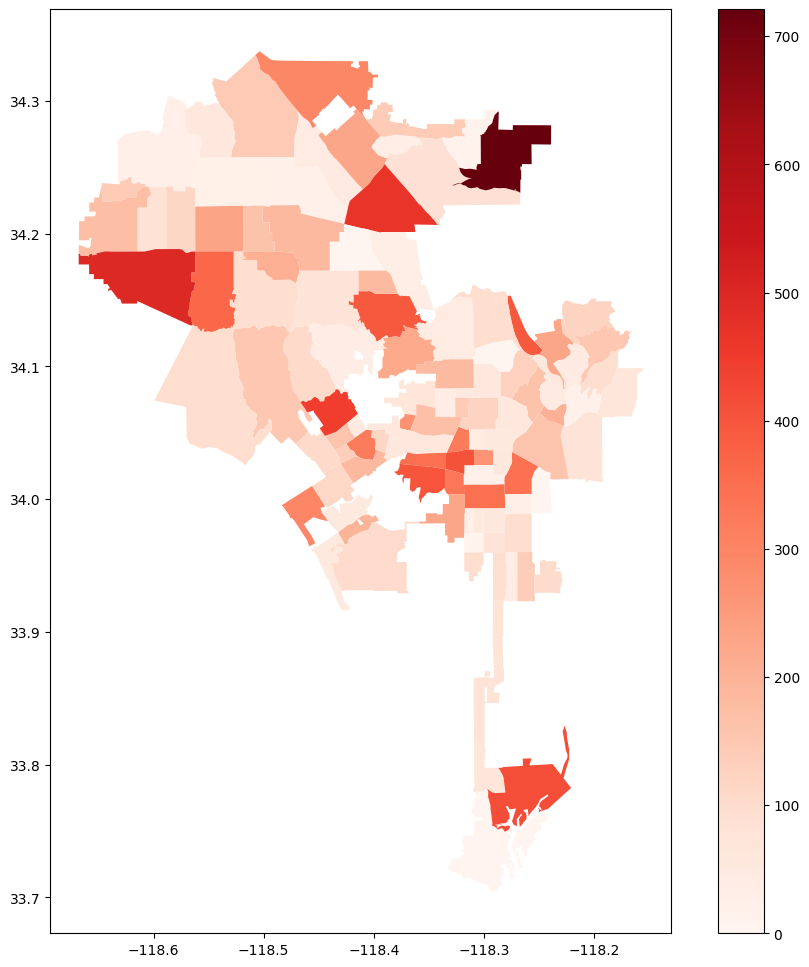

In [42]:
fig,ax = plt.subplots(figsize=(12,12))

tracts_vehicle_1.plot(ax=ax,column='2_Vehicle_Available',legend=True,cmap='Reds')
plt.savefig('2_Vehicle_Available')

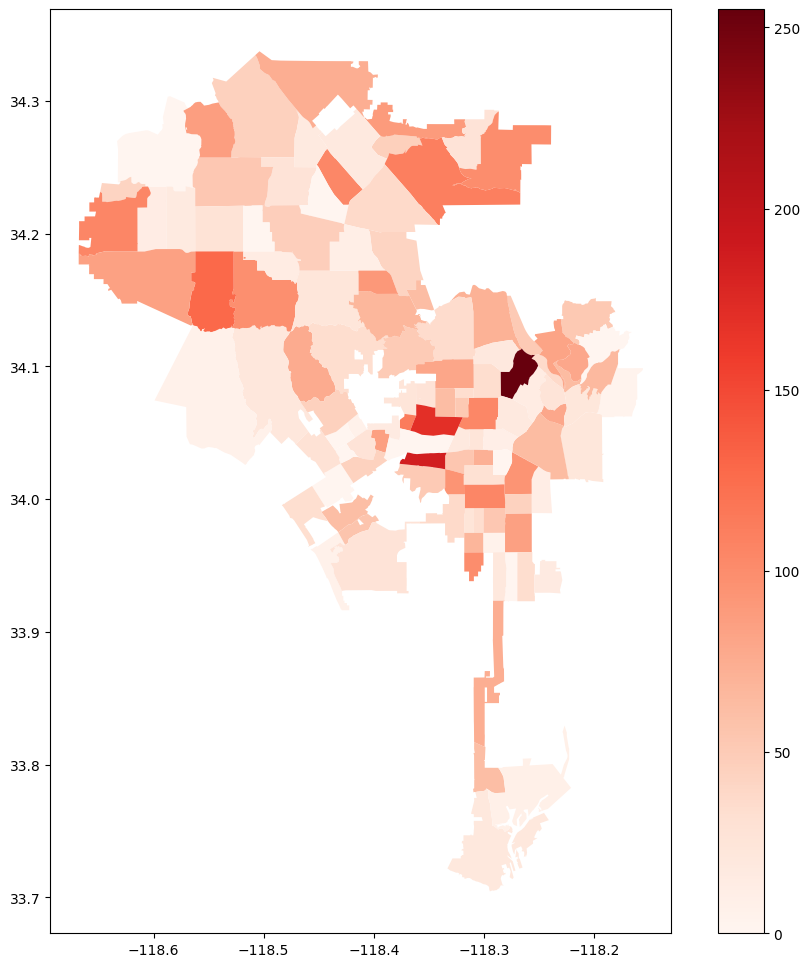

In [43]:
fig,ax = plt.subplots(figsize=(12,12))

tracts_vehicle_1.plot(ax=ax,column='3_Vehicle_Available',legend=True,cmap='Reds')
plt.savefig('3_Vehicle_Available')

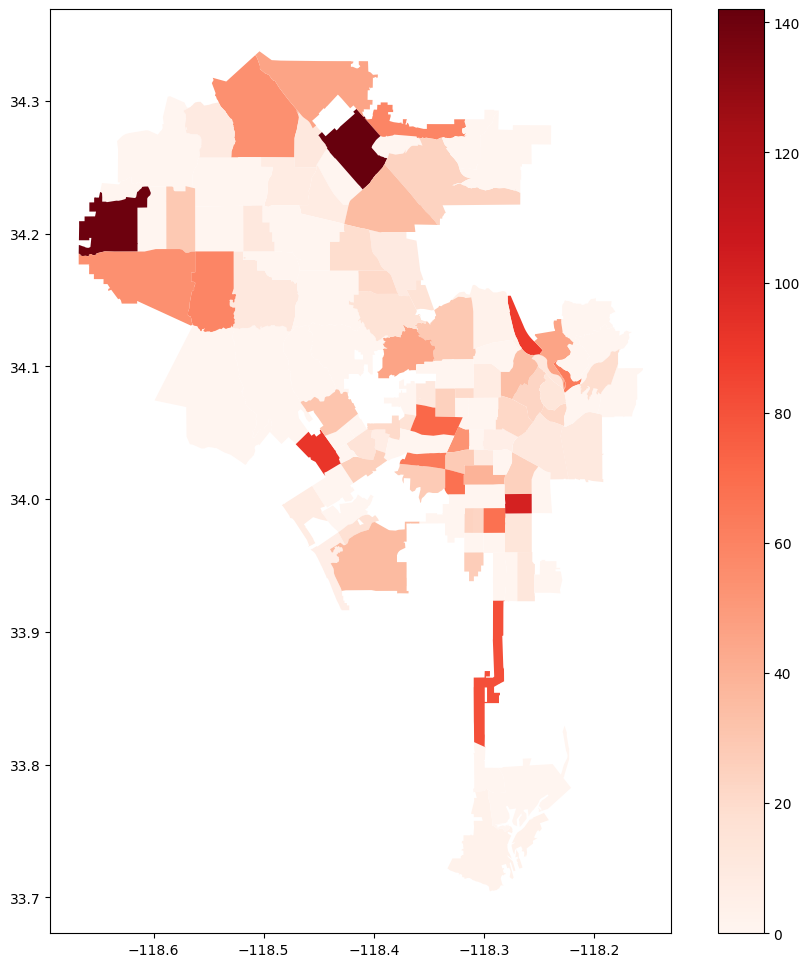

In [44]:
fig,ax = plt.subplots(figsize=(12,12))

tracts_vehicle_1.plot(ax=ax,column='4_Vehicle_Available',legend=True,cmap='Reds')
plt.savefig('4_Vehicle_Available')

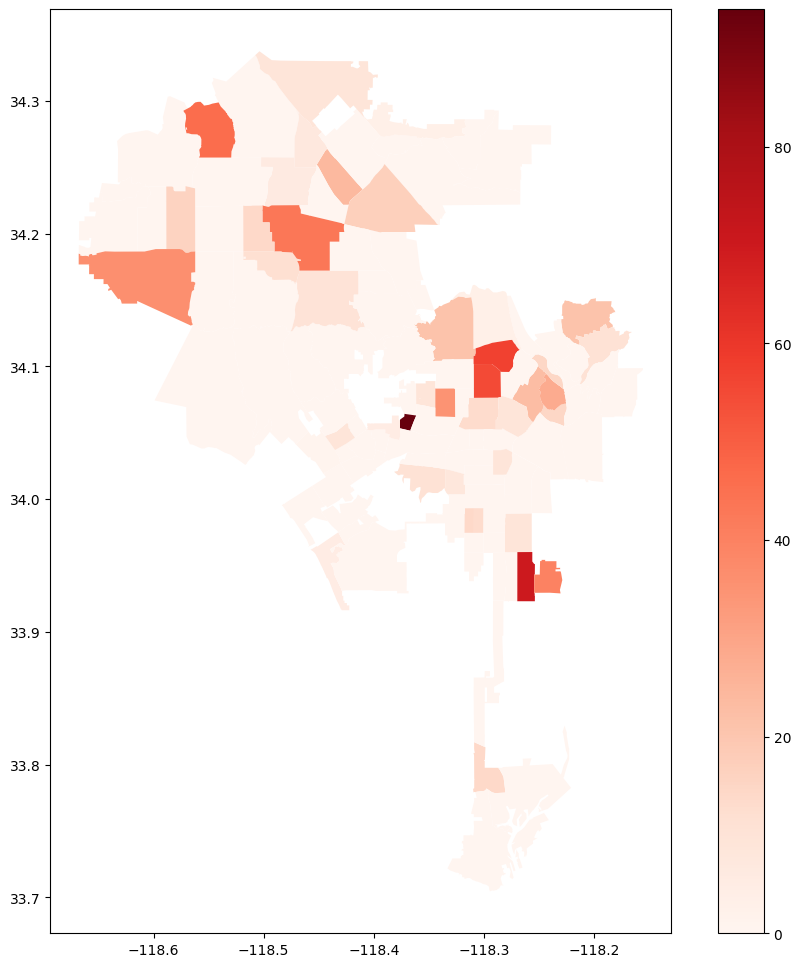

In [45]:
fig,ax = plt.subplots(figsize=(12,12))

tracts_vehicle_1.plot(ax=ax,column='5_or_More_Vehicles_Available',legend=True,cmap='Reds')
plt.savefig('5_or_More_Vehicles_Available')

In [71]:
neighborhood_1=gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")
neighborhood_1.head()

OBJECTID                    name  \
0         1         Adams-Normandie   
1         2                  Arleta   
2         3       Arlington Heights   
3         4         Atwater Village   
4         5  Baldwin Hills/Crenshaw   

                                            geometry  
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...  
1  POLYGON ((-118.44255 34.26412, -118.44240 34.2...  
2  POLYGON ((-118.31862 34.05306, -118.31673 34.0...  
3  MULTIPOLYGON (((-118.27886 34.15321, -118.2788...  
4  POLYGON ((-118.36102 34.02532, -118.36026 34.0...

In [72]:
Collision.head()

DR Number Date Reported Date Occurred  Time Occurred  Area ID Area Name  \
0  180104039    01/01/2018    01/01/2018           1740        1   Central   
1  180104668    01/10/2018    01/01/2018           1540        1   Central   
2  180104040    01/01/2018    01/01/2018           1900        1   Central   
3  180104001    01/01/2018    01/01/2018             38        1   Central   
4  180104044    01/01/2018    01/01/2018           1030        1   Central   

   Reporting District  Crime Code Crime Code Description  \
0                 192         997      TRAFFIC COLLISION   
1                 182         997      TRAFFIC COLLISION   
2                 154         997      TRAFFIC COLLISION   
3                 192         997      TRAFFIC COLLISION   
4                 182         997      TRAFFIC COLLISION   

                             MO Codes  Victim Age Victim Sex Victim Descent  \
0       3101 3401 3701 3009 3025 3036        50.0          F              O   
1            3101 3401 3701 3004 3030         NaN          M              W   
2       3101 3401 3701 3006 3030 3032        25.0          M              W   
3  3101 3401 3701 3002 3011 3034 3036         NaN          M              H   
4       3101 3401 3701 3004 3026 3036        33.0          M              B   

   Premise Code Premise Description                          Address  \
0         101.0              STREET  VENICE                       BL   
1         101.0              STREET  VERDUGO                      RD   
2         108.0         PARKING LOT                           SPRING   
3         101.0              STREET                            GRAND   
4         101.0              STREET                             HOPE   

                      Cross Street              Location  Latitude  Longitude  
0  GRAND                        AV  (34.0363, -118.2677)   34.0363  -118.2677  
1                            YUKON   (34.042, -118.2625)   34.0420  -118.2625  
2                              6TH   (34.046, -118.2509)   34.0460  -118.2509  
3                       WASHINGTON  (34.0327, -118.2683)   34.0327  -118.2683  
4                             PICO  (34.0395, -118.2656)   34.0395  -118.2656

In [73]:
Collision_mini = Collision[['Date Occurred', 'Time Occurred', 'Premise Description','Address','Cross Street', 'Latitude','Longitude']].copy()
Collision_mini.head()

Date Occurred  Time Occurred Premise Description  \
0    01/01/2018           1740              STREET   
1    01/01/2018           1540              STREET   
2    01/01/2018           1900         PARKING LOT   
3    01/01/2018             38              STREET   
4    01/01/2018           1030              STREET   

                           Address                     Cross Street  Latitude  \
0  VENICE                       BL  GRAND                        AV   34.0363   
1  VERDUGO                      RD                            YUKON   34.0420   
2                           SPRING                              6TH   34.0460   
3                            GRAND                       WASHINGTON   34.0327   
4                             HOPE                             PICO   34.0395   

   Longitude  
0  -118.2677  
1  -118.2625  
2  -118.2509  
3  -118.2683  
4  -118.2656

In [74]:
Collision_mini['Latitude'] = Collision_mini['Latitude'].astype(float)
Collision_mini['Longitude'] = Collision_mini['Longitude'].astype(float)
Collision_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191371 entries, 0 to 191370
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date Occurred        191371 non-null  object 
 1   Time Occurred        191371 non-null  int64  
 2   Premise Description  190450 non-null  object 
 3   Address              191371 non-null  object 
 4   Cross Street         180834 non-null  object 
 5   Latitude             191371 non-null  float64
 6   Longitude            191371 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 10.2+ MB


<Axes: >

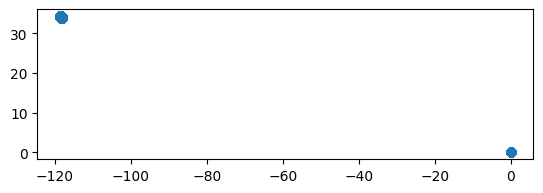

In [75]:
gdf = gpd.GeoDataFrame(
    Collision_mini, geometry=gpd.points_from_xy(Collision_mini.Longitude, Collision_mini.Latitude),crs=4326)

gdf.plot()

In [76]:
Collision_neighborhood_1 = gpd.sjoin(neighborhood_1, gdf)


In [77]:
Collision_neighborhood_1.head()

OBJECTID             name  \
0         1  Adams-Normandie   
0         1  Adams-Normandie   
0         1  Adams-Normandie   
0         1  Adams-Normandie   
0         1  Adams-Normandie   

                                            geometry  index_right  \
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...       171740   
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...       136846   
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...        44762   
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...        27923   
0  POLYGON ((-118.30069 34.03731, -118.30388 34.0...       134810   

  Date Occurred  Time Occurred Premise Description  \
0    10/26/2021            800              STREET   
0    07/19/2020           1130              STREET   
0    10/14/2018           1430              STREET   
0    07/01/2018           2240              STREET   
0    07/01/2020           1725              STREET   

                           Address                        Cross Street  \
0  24TH                         ST     MAGNOLIA                     AV   
0  FIGUEROA                     ST     KING                         BL   
0                            ADAMS  S  30TH                         ST   
0  ADAMS                        BL     RAYMOND                      AV   
0  ADAMS                        BL     VERMONT                      AV   

   Latitude  Longitude  
0   34.0307  -118.2923  
0   34.0307  -118.2923  
0   34.0307  -118.2923  
0   34.0307  -118.2923  
0   34.0328  -118.2921

In [78]:
Collision_1_counts = Collision_neighborhood_1.value_counts('name').reset_index(name='Collision_1_counts')
Collision_1_counts

name  Collision_1_counts
0                  Downtown                9219
1                  Van Nuys                6025
2                 Hollywood                5792
3                 Koreatown                4988
4                  Westlake                4816
5             Boyle Heights                4202
6                  Florence                3797
7           North Hollywood                3689
8                Northridge                3437
9    Historic South-Central                3420
10           East Hollywood                3193
11           Vermont Square                3108
12                   Reseda                3017
13               Sun Valley                2983
14              Valley Glen                2980
15            Green Meadows                2970
16             Sherman Oaks                2970
17          Vermont-Slauson                2889
18                 Mid-City                2870
19                  Pacoima                2854
20              Westchester                2807
21                San Pedro                2668
22            Panorama City                2606
23           Woodland Hills                2426
24               Wilmington                2398
25              North Hills                2392
26              Canoga Park                2309
27                   Sylmar                2290
28                   Venice                2266
29               Pico-Union                2255
30                 Winnetka                2249
31                Hyde Park                2234
32          Exposition Park                2163
33             Mid-Wilshire                2079
34           Vermont Knolls                2065
35            Vermont Vista                1952
36                    Watts                1948
37                 Sawtelle                1937
38          Central-Alameda                1918
39      Broadway-Manchester                1806
40               South Park                1797
41                   Encino                1796
42               Chatsworth                1767
43              Studio City                1737
44            Granada Hills                1684
45   Baldwin Hills/Crenshaw                1538
46            Beverly Grove                1534
47          Hollywood Hills                1491
48           Jefferson Park                1476
49           Harbor Gateway                1472
50                  Tarzana                1439
51                Echo Park                1430
52          Lincoln Heights                1386
53                  Fairfax                1382
54               West Adams                1319
55            Highland Park                1268
56          University Park                1254
57                 Westwood                1228
58                Los Feliz                1200
59             Leimert Park                1188
60          Harvard Heights                1170
61                    Palms                1155
62        Arlington Heights                1059
63              Silver Lake                1058
64              Lake Balboa                1046
65                   Arleta                1024
66                El Sereno                1022
67             Hancock Park                1021
68        Manchester Square                1017
69                Brentwood                1014
70               West Hills                 996
71             Harvard Park                 983
72      Chesterfield Square                 936
73              Harbor City                 935
74            Mission Hills                 922
75            Gramercy Park                 922
76                Chinatown                 910
77           Pico-Robertson                 904
78                Mar Vista                 867
79                  Del Rey                 861
80        Pacific Palisades                 832
81     Hollywood Hills West                 799
82            Glassell Park            

In [79]:
Collision_neighborhood_1 = Collision_neighborhood_1.merge(Collision_1_counts, how='left', on='name')

In [80]:
Collision_neighborhood_1.sample(10)

OBJECTID                    name  \
79880         53               Koreatown   
114280        74              Pico-Union   
79954         53               Koreatown   
176615       107                Westlake   
1560           2                  Arleta   
99740         67         North Hollywood   
63451         47  Historic South-Central   
76134         51               Hyde Park   
94401         62            Mid-Wilshire   
169125       105             Westchester   

                                                 geometry  index_right  \
79880   POLYGON ((-118.28785 34.06182, -118.28783 34.0...       150840   
114280  POLYGON ((-118.28146 34.05250, -118.28094 34.0...       109708   
79954   POLYGON ((-118.28785 34.06182, -118.28783 34.0...        38730   
176615  POLYGON ((-118.25908 34.05389, -118.25984 34.0...       175455   
1560    POLYGON ((-118.44255 34.26412, -118.44240 34.2...       129497   
99740   POLYGON ((-118.39622 34.20133, -118.39402 34.2...       129295   
63451   POLYGON ((-118.26575 34.03147, -118.26361 34.0...        75838   
76134   POLYGON ((-118.31761 33.98910, -118.31766 33.9...       181584   
94401   POLYGON ((-118.32296 34.05468, -118.32672 34.0...       108440   
169125  POLYGON ((-118.35862 33.98240, -118.35856 33.9...        55446   

       Date Occurred  Time Occurred Premise Description  \
79880     11/13/2020            210              STREET   
114280    12/05/2019           2200              STREET   
79954     09/06/2018            915              STREET   
176615    01/13/2022           1310         PARKING LOT   
1560      05/08/2020           1325              STREET   
99740     05/06/2020           2015              STREET   
63451     05/02/2019           1420              STREET   
76134     05/25/2022           2250              STREET   
94401     11/26/2019           1930              STREET   
169125    12/19/2018            530              STREET   

                                        Address  \
79880           6TH                          ST   
114280  1400 W  PICO                         BL   
79954                                       6TH   
176615          6TH                          ST   
1560            PAXTON                       ST   
99740           FAIR                         AV   
63451           GRAND                        AV   
76134           ARLINGTON                    AV   
94401                                   OLYMPIC   
169125          SEPULVEDA                    BL   

                           Cross Street  Latitude  Longitude  \
79880   ALEXANDRIA                   AV   34.0636  -118.2979   
114280                              NaN   34.0453  -118.2738   
79954                           BERENDO   34.0636  -118.2941   
176615  COMMONWEALTH                 AV   34.0637  -118.2857   
1560    SHARP                        AV   34.2624  -118.4417   
99740   OXNARD                       ST   34.1795  -118.3746   
63451                            VERNON   34.0038  -118.2805   
76134   52ND                         ST   33.9950  -118.3182   
94401                           FAIRFAX   34.0582  -118.3638   
169125  CENTURY                      BL   33.9445  -118.3961   

        Collision_1_counts  
79880                 4988  
114280                2255  
79954                 4988  
176615                4816  
1560                  1024  
99740                 3689  
63451                 3420  
76134                 2234  
94401                 2079  
169125                2807

In [81]:
import matplotlib.pyplot as plt

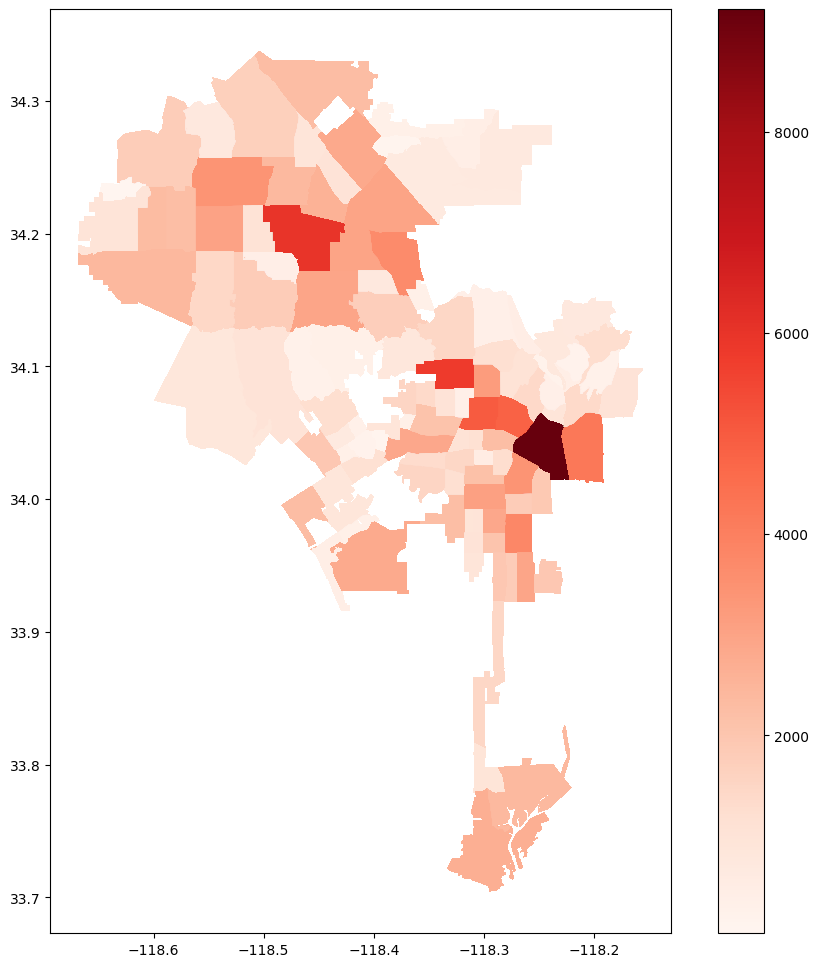

In [82]:
fig,ax = plt.subplots(figsize=(12,12))

Collision_neighborhood_1.plot(ax=ax,column='Collision_1_counts',legend=True,cmap='Reds')
plt.savefig('Private Vehicle Accident')